In [1]:
import os, collections, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 300

In [2]:
dfs = []
for region in ("IGK", "TRA", 'HLA', "IGH", "chr6_50M"):
    tsv = f"../../data/evaluation/CHM13/{region}/pbsim_ONT_93_30k/kmer_k16/overlap_statistics.tsv"
    df = pd.read_table(tsv)
    df.insert(0, "region", region)
    dfs.append(df)
stat_df = pd.concat(dfs)
df = stat_df
df['label'] = df['config_id'].map(str) + " " + df['description']
df['connected_fraction'] = 1 - df['singleton_fraction']

In [3]:
stat_df['label'].unique()

array(['0 Minimap2 all-vs-all', '1 HNSW (IDF, 100 dim.)',
       '2 HNSW (TF-IDF, 100 dim.)', '3 LowHash (binary)',
       '4 MinHash (binary)', '5 Weighted LowHash (TF)',
       '6 Weighted LowHash (IDF)', '7 Weighted LowHash (TF-IDF)',
       '8 Weighted MinHash (TF)', '9 Weighted MinHash (IDF)',
       '10 Weighted MinHash (TF-IDF)', '11 PQ (IDF)', '12 PQ (TF-IDF)',
       '13 NNdescent (IDF)', '14 NNdescent (TF-IDF)',
       '15 Exact Euclidean (binary)', '16 Exact Euclidean (TF)',
       '17 Exact Euclidean (IDF)', '18 Exact Euclidean (TF-IDF)',
       '19 Exact Euclidean (IDF, 100 dim.)',
       '20 Exact Euclidean (TF-IDF, 100 dim.)'], dtype=object)

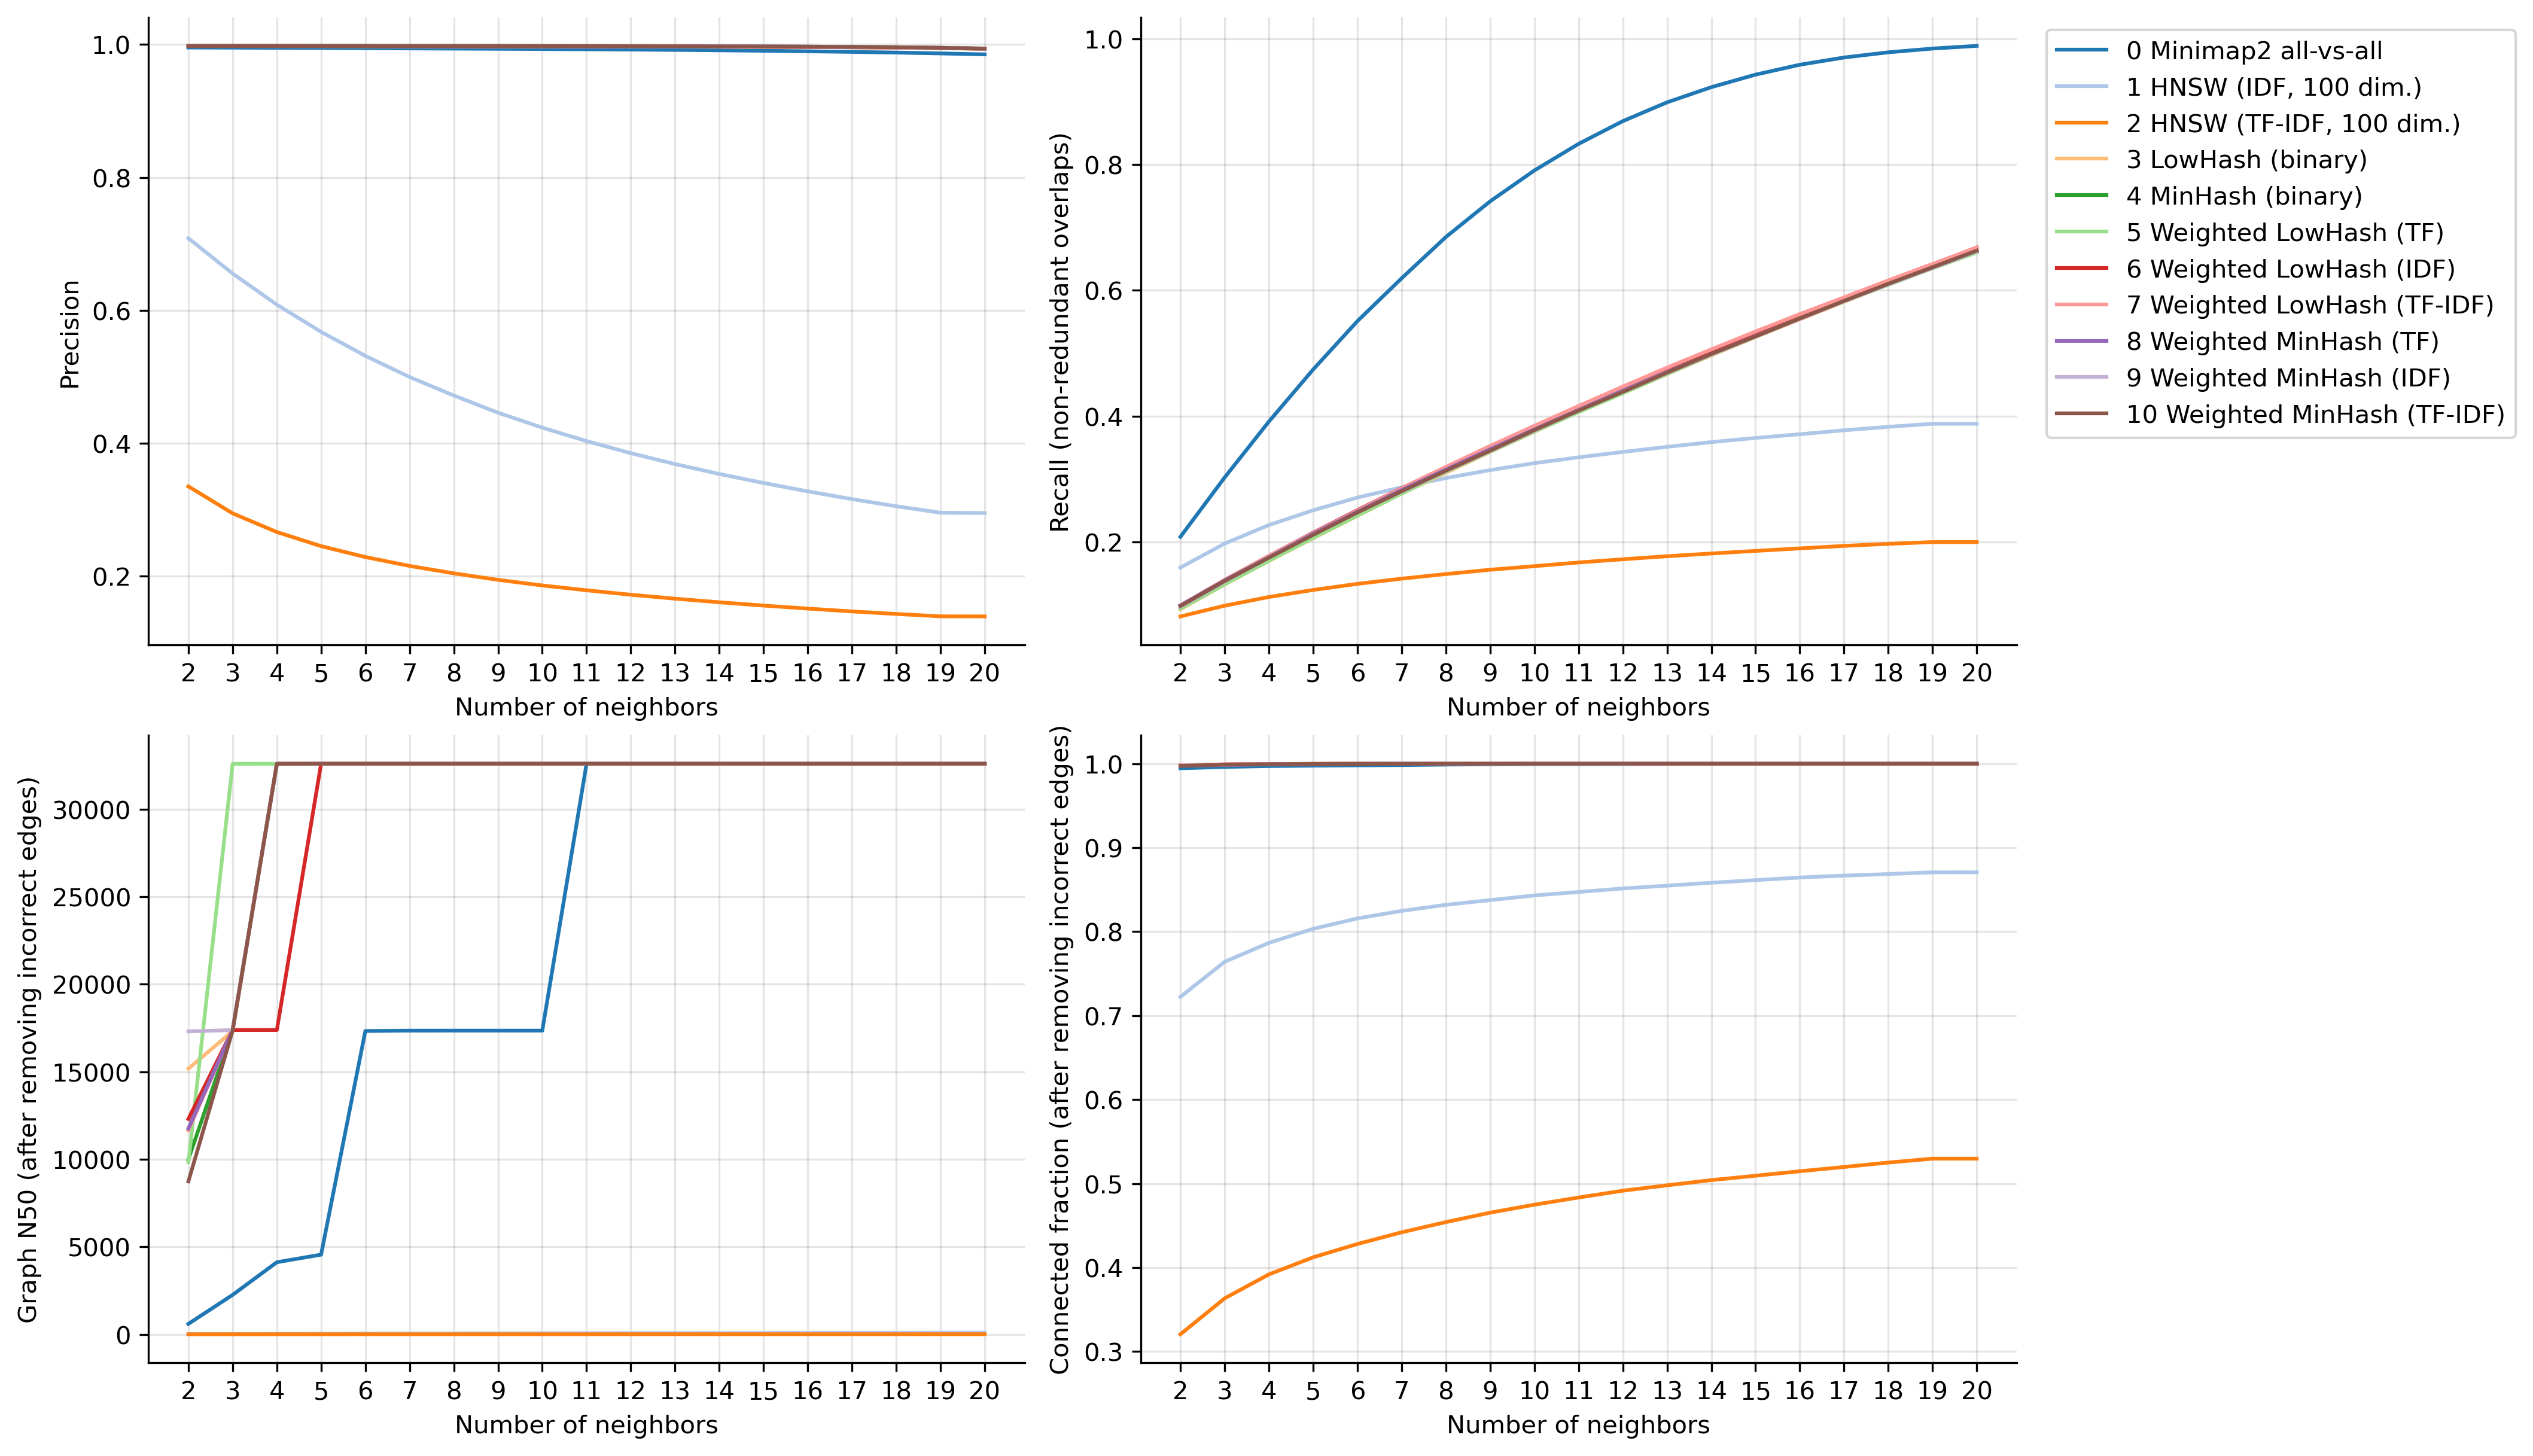

In [5]:
df = stat_df.query("region == 'chr6_50M'")

y_labels = dict(
    precision="Precision",
    nr_recall="Recall (non-redundant overlaps)",
    N50="Graph N50 (after removing incorrect edges)",
    connected_fraction="Connected fraction (after removing incorrect edges)"
)

palette = 'tab20'
k_values = np.arange(2, df['n_neighbors'].max() + 1)

fig, axes = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
for i, ax in enumerate( itertools.chain(*axes) ):
    y = list(y_labels)[i]
    x = 'n_neighbors'
    hue = 'label'
    g = seaborn.lineplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=palette)
    ax.set_xticks(k_values)
    ax.set_xlabel("Number of neighbors")
    ax.set_ylabel(y_labels[y])
    ax.grid(axis='both', color='k', alpha=0.1)

    if i == 1:
        ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
    else:
        ax.get_legend().remove()

    ax.spines[['top', 'right']].set_visible(False)

(0.994, 0.998)

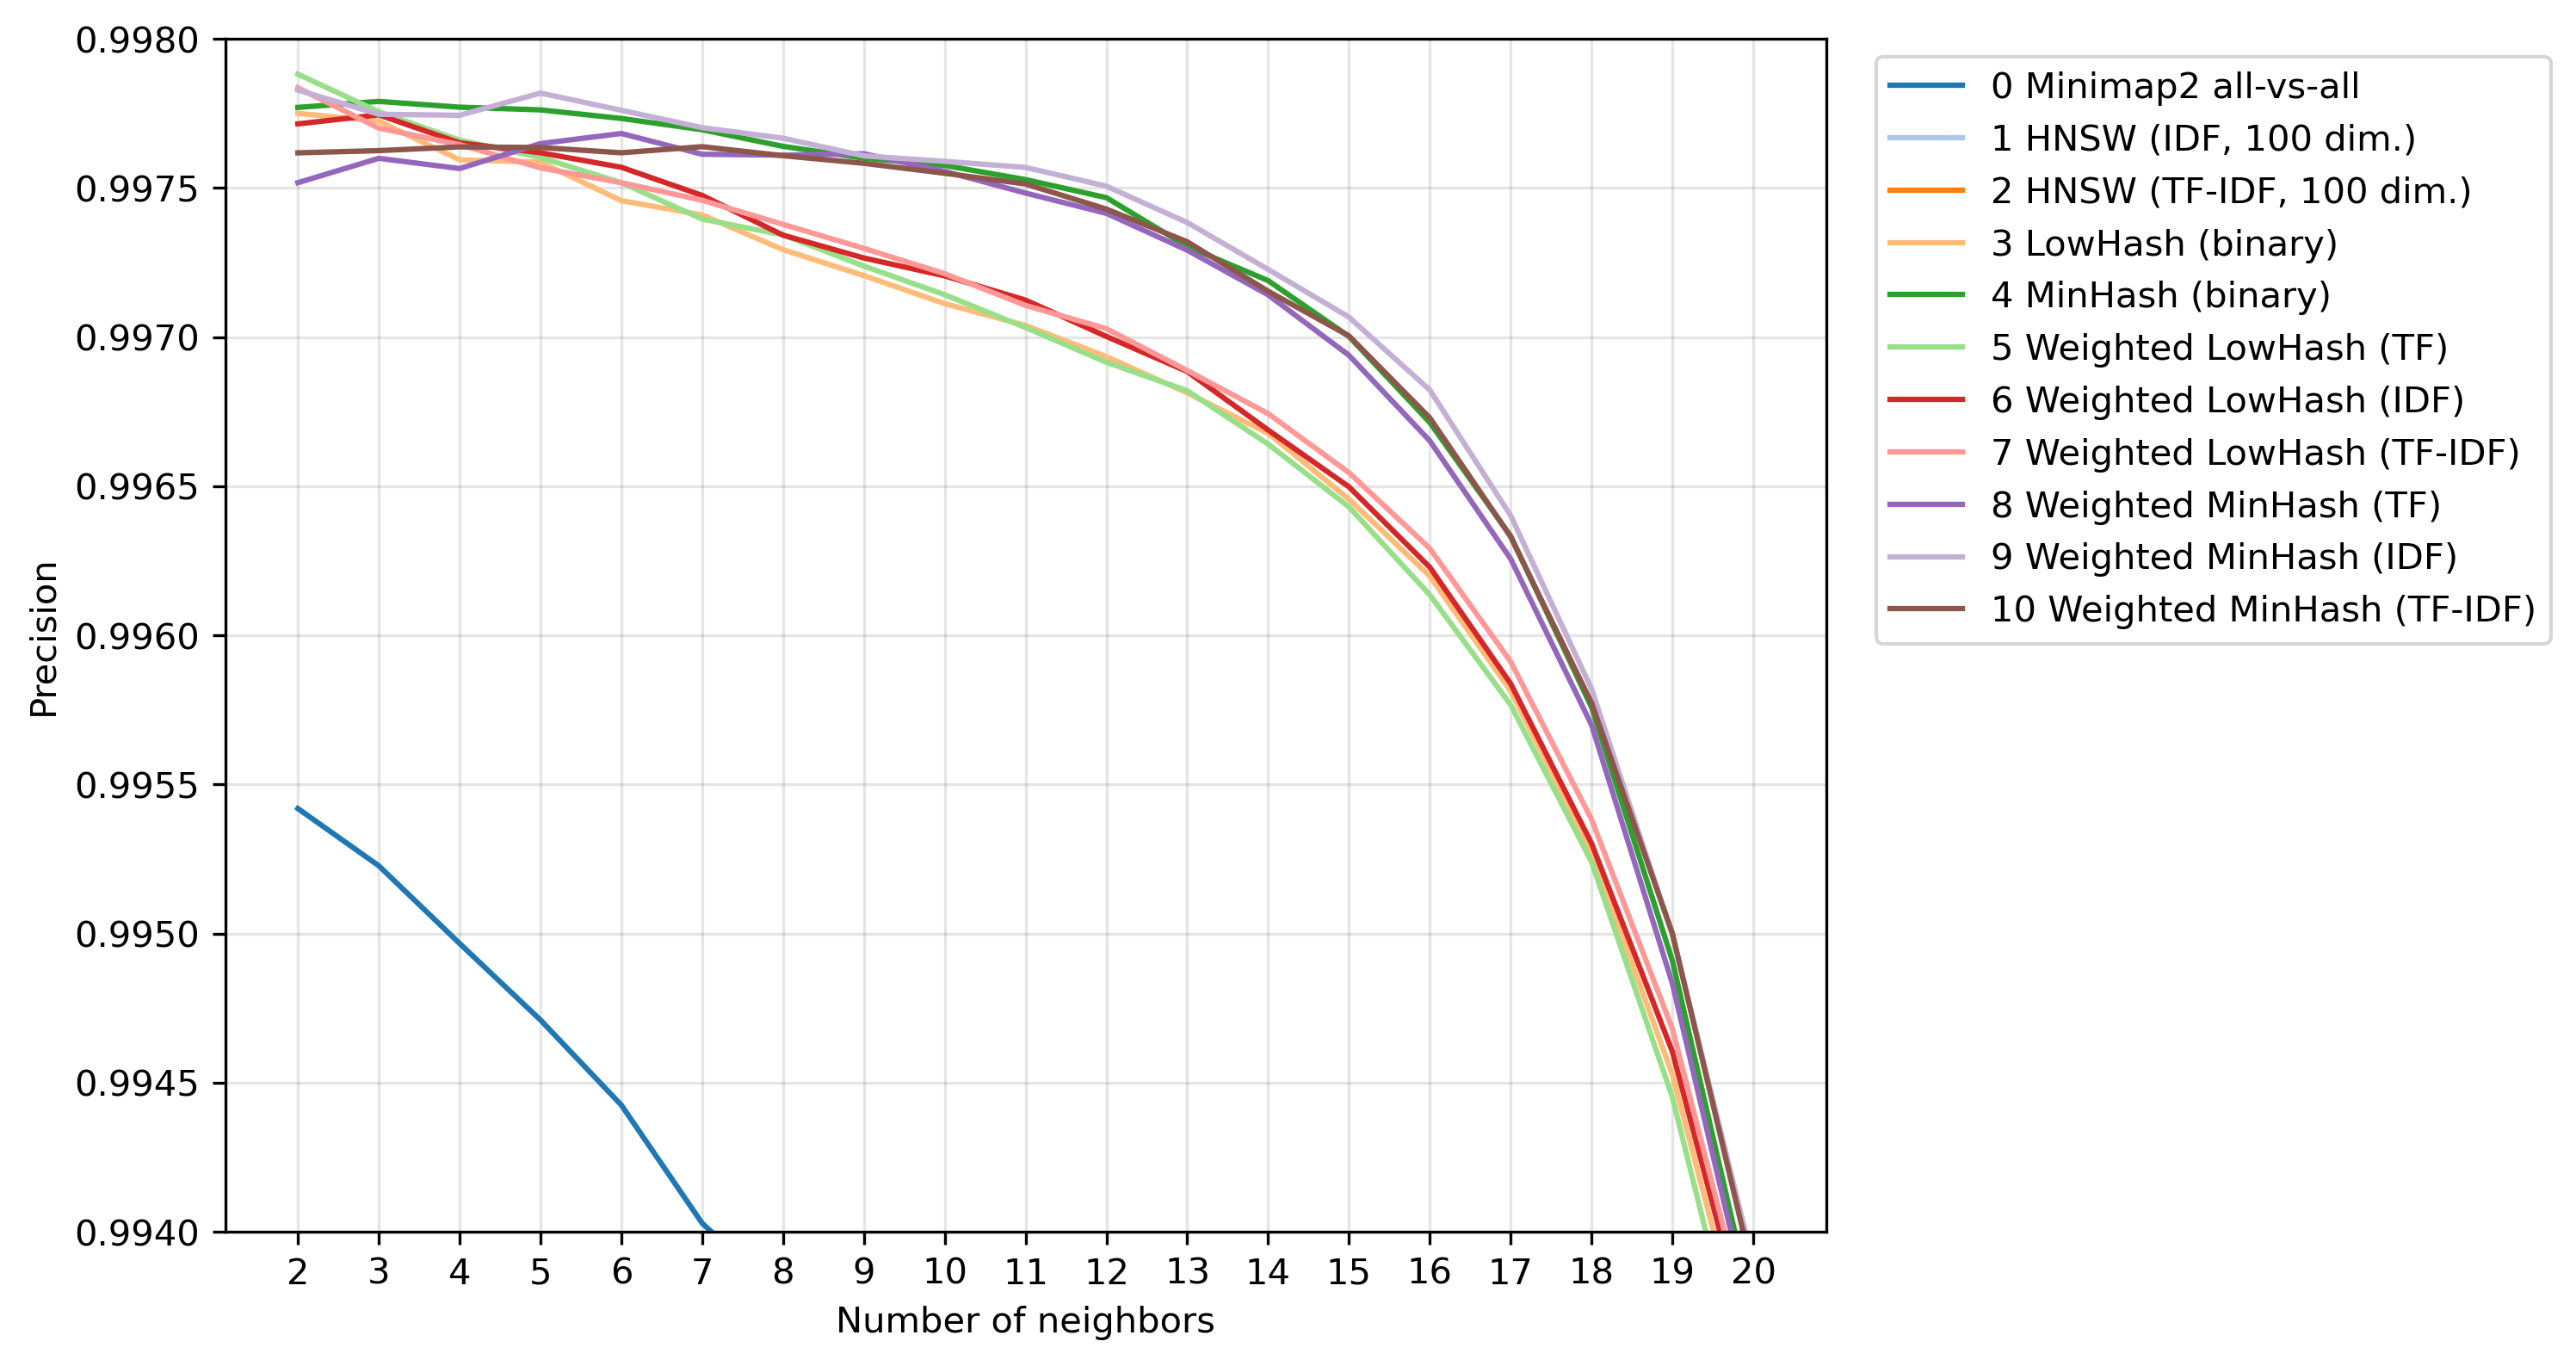

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
y = 'precision'
g = seaborn.lineplot(ax=ax, data=df, x=x, y=y, hue='label', palette=palette)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
ax.grid(axis='both', color='k', alpha=0.1)
ax.set_xticks(k_values)
ax.set_xlabel("Number of neighbors")
ax.set_ylabel(y_labels[y])
ax.grid(axis='both', color='k', alpha=0.1)
ax.set_ylim(0.994, 0.998)